In [30]:
# Importing all necessary Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Loading the datasets
hour_df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Bike-Rental-Prediction-Analysis/main/Datasets/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Bike-Rental-Prediction-Analysis/main/Datasets/day.csv')


In [32]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

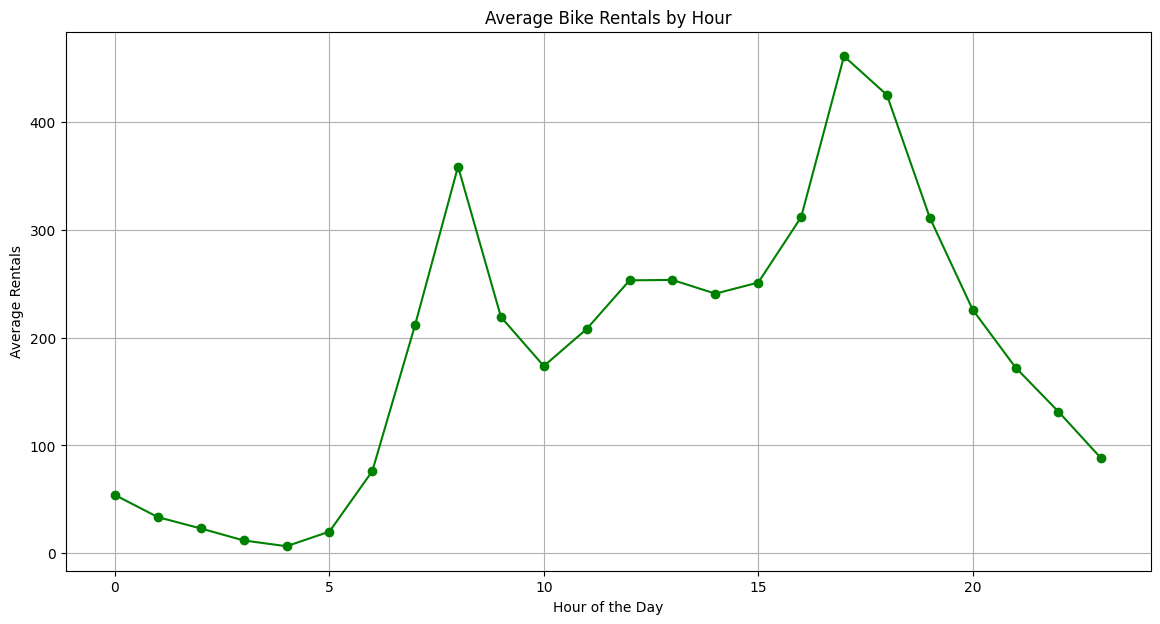

In [40]:
# Hourly Rental Patterns
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(14, 7))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', color='green')

# Setting labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Hour')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


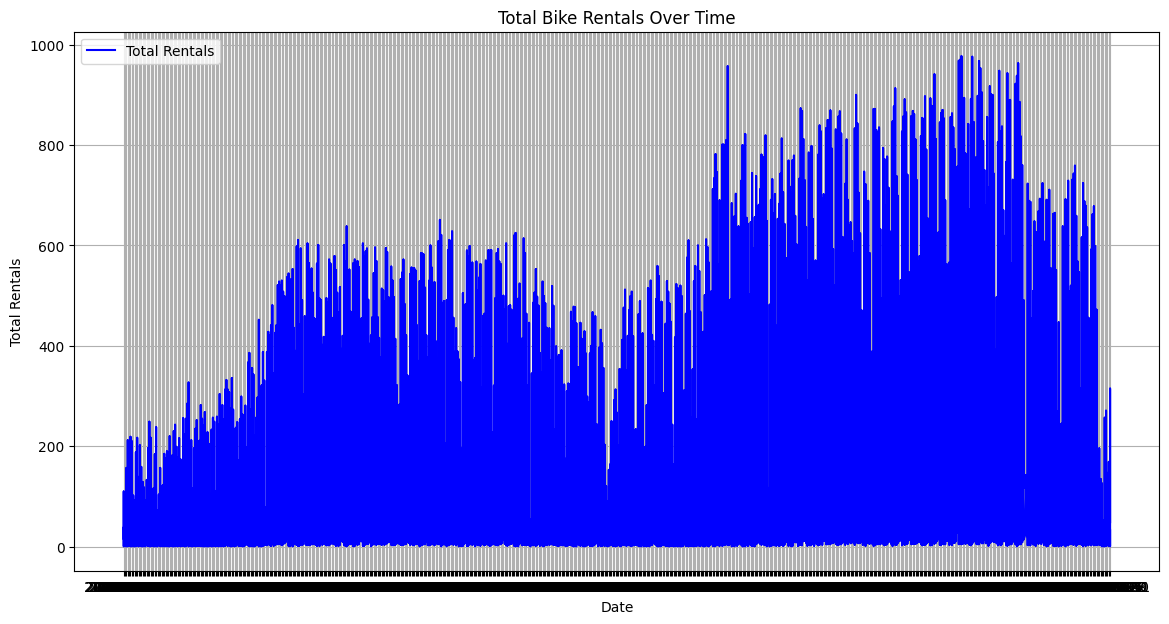

In [41]:
# Rental Counts Over Time
plt.figure(figsize=(14, 7))
plt.plot(hour_df['dteday'], hour_df['cnt'], label='Total Rentals', color='blue')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals Over Time')

# Adding gridlines for better readability
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()

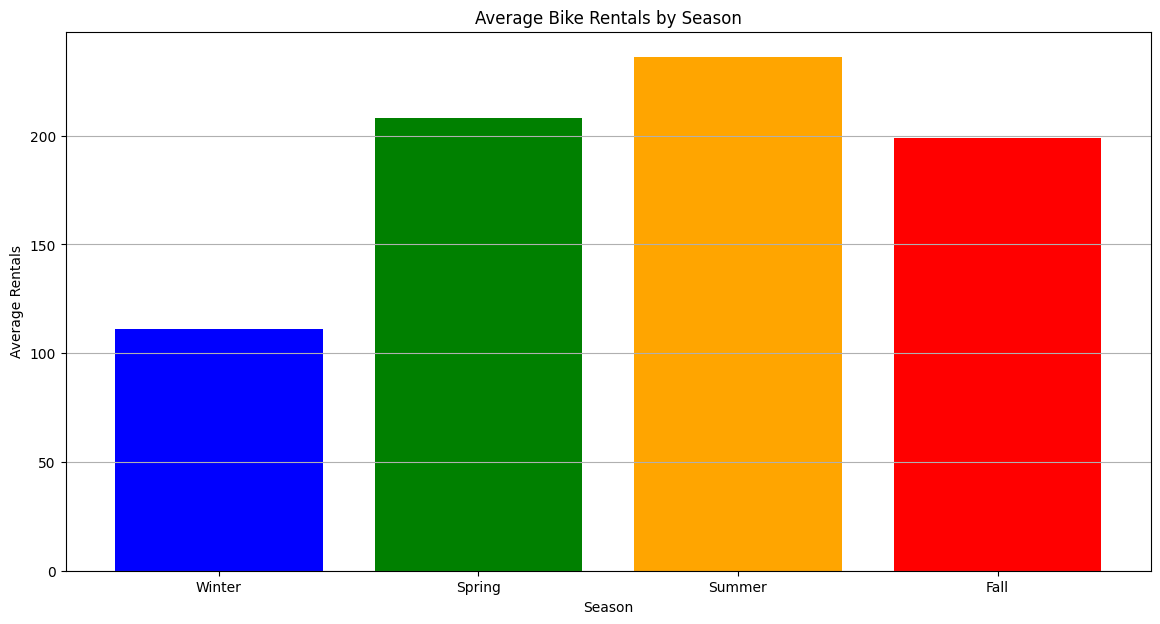

In [42]:
# Seasonal Rental Patterns
seasonal_rentals = hour_df.groupby('season')['cnt'].mean()
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(14, 7))
plt.bar(season_labels, seasonal_rentals.values, color=['blue', 'green', 'orange', 'red'])

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Season')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


<Figure size 1400x700 with 0 Axes>

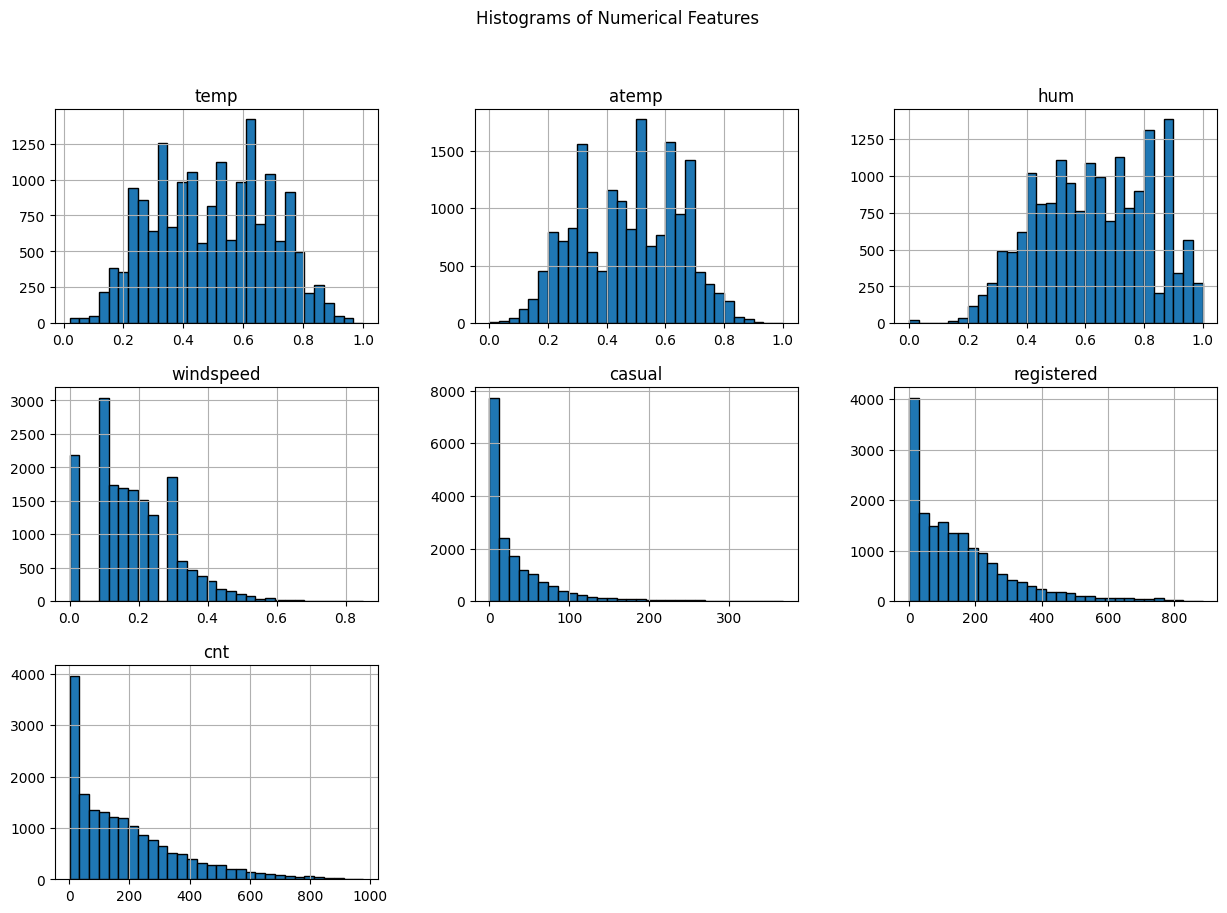

In [43]:
# Histograms
plt.figure(figsize=(14, 7))
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].hist(bins=30, figsize=(15, 10), edgecolor='black')

# Setting the main title for all plots
plt.suptitle('Histograms of Numerical Features')

# Displaying the plots
plt.show()


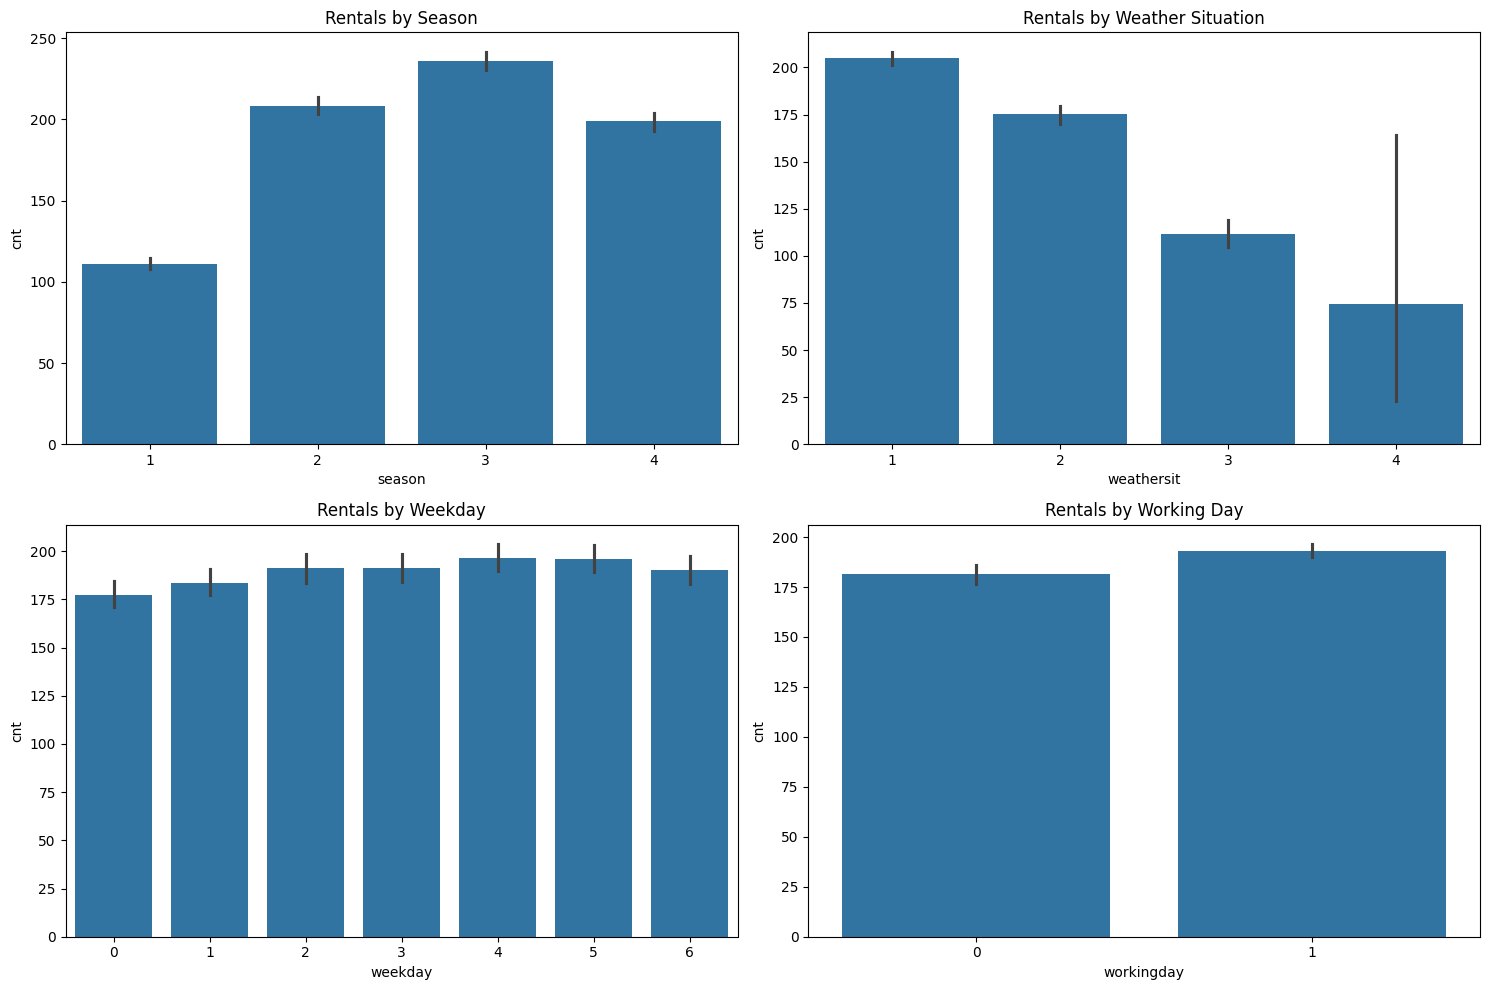

In [44]:
# Box Plots
plt.figure(figsize=(15, 10))

# Rentals by Season
plt.subplot(2, 2, 1)
sns.barplot(x='season', y='cnt', data=hour_df)
plt.title('Rentals by Season')

# Rentals by Weather Situation
plt.subplot(2, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Rentals by Weather Situation')

# Rentals by Weekday
plt.subplot(2, 2, 3)
sns.barplot(x='weekday', y='cnt', data=hour_df)
plt.title('Rentals by Weekday')

# Rentals by Working Day
plt.subplot(2, 2, 4)
sns.barplot(x='workingday', y='cnt', data=hour_df)
plt.title('Rentals by Working Day')

# Adjust layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


<Figure size 1400x700 with 0 Axes>

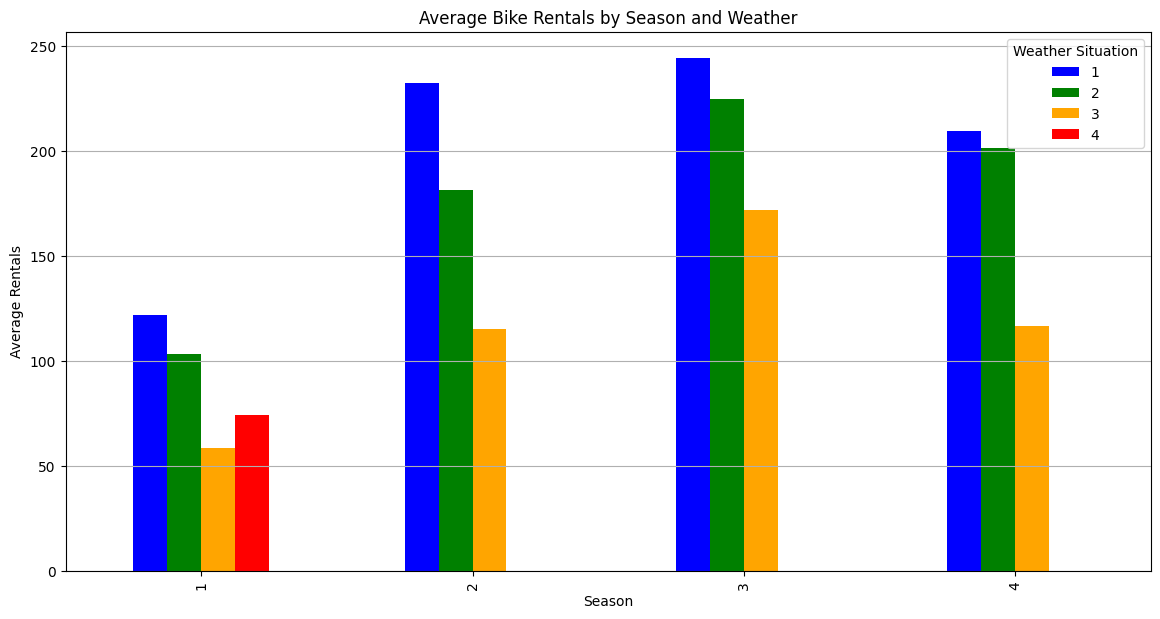

In [45]:
# Rental Counts by Season and Weather
season_weather_rentals = hour_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

plt.figure(figsize=(14, 7))
season_weather_rentals.plot(kind='bar', figsize=(14, 7), color=['blue', 'green', 'orange', 'red'])

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Season and Weather')
plt.legend(title='Weather Situation')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


<Figure size 1400x700 with 0 Axes>

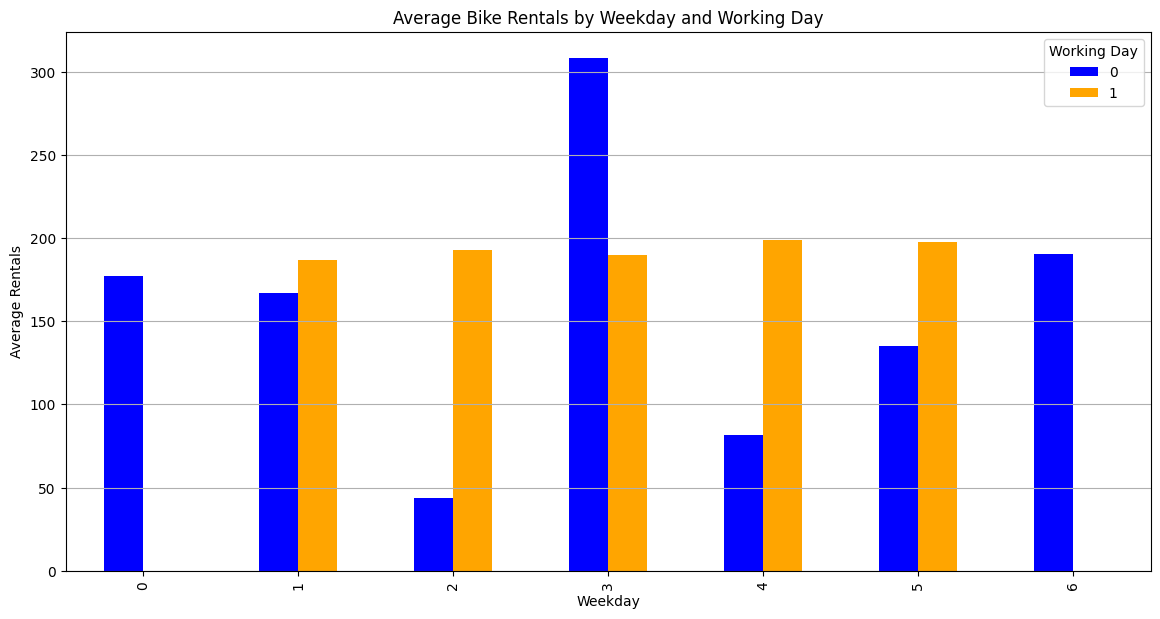

In [46]:
# Rental Counts by Weekday and Working Day
weekday_workingday_rentals = hour_df.groupby(['weekday', 'workingday'])['cnt'].mean().unstack()

plt.figure(figsize=(14, 7))
weekday_workingday_rentals.plot(kind='bar', figsize=(14, 7), color=['blue', 'orange'])

# Setting labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Weekday and Working Day')
plt.legend(title='Working Day')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_6900\3886492827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_range', y='cnt', data=hour_df, palette='Purples')


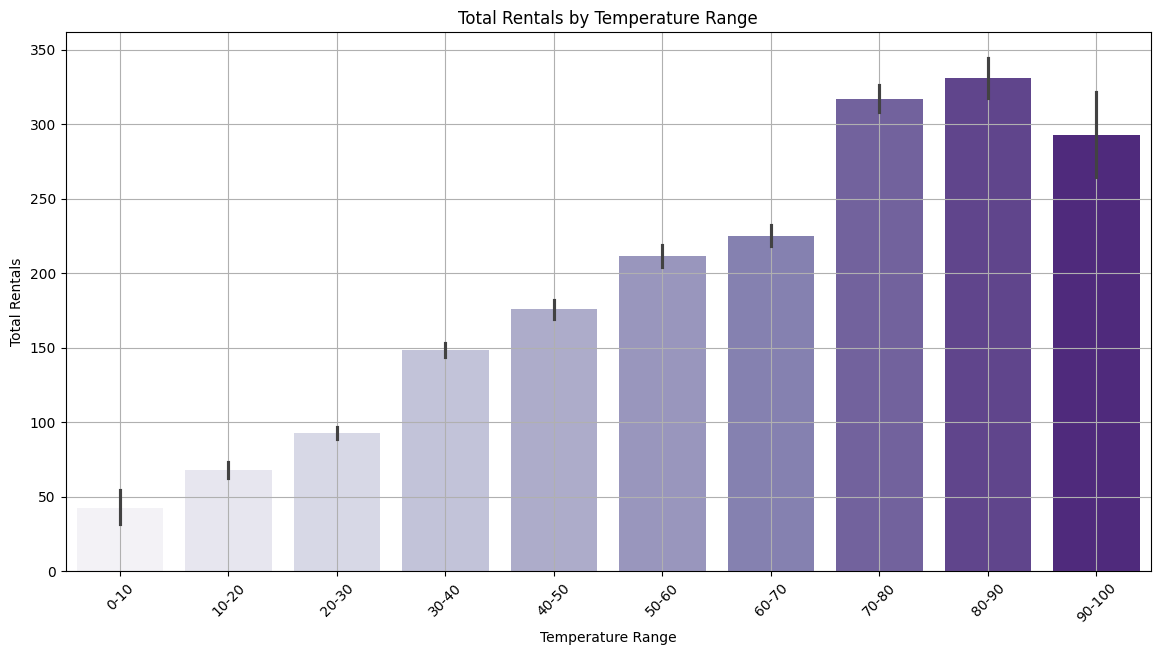

In [47]:
# Create a new column for temperature ranges
hour_df['temp_range'] = pd.cut(hour_df['temp'], bins=10, labels=[f'{i*10}-{(i+1)*10}' for i in range(10)])

# Box Plot of Rentals by Temperature Range
plt.figure(figsize=(14, 7))
sns.barplot(x='temp_range', y='cnt', data=hour_df, palette='Purples')

# Setting labels and title
plt.xlabel('Temperature Range')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Temperature Range')

# Adding gridlines for better readability
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


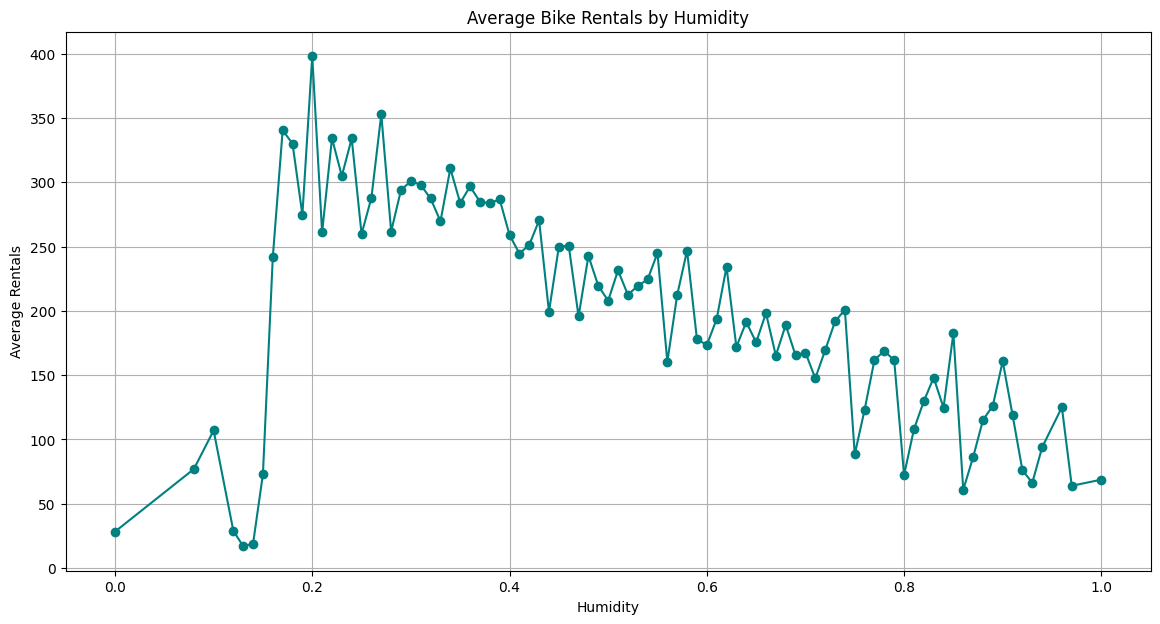

In [48]:
# Grouping the data by 'hum' and calculating the average rentals
humidity_rentals = hour_df.groupby('hum')['cnt'].mean()

plt.figure(figsize=(14, 7))
plt.plot(humidity_rentals.index, humidity_rentals.values, marker='o', color='teal')

# Setting labels and title
plt.xlabel('Humidity')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Humidity')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


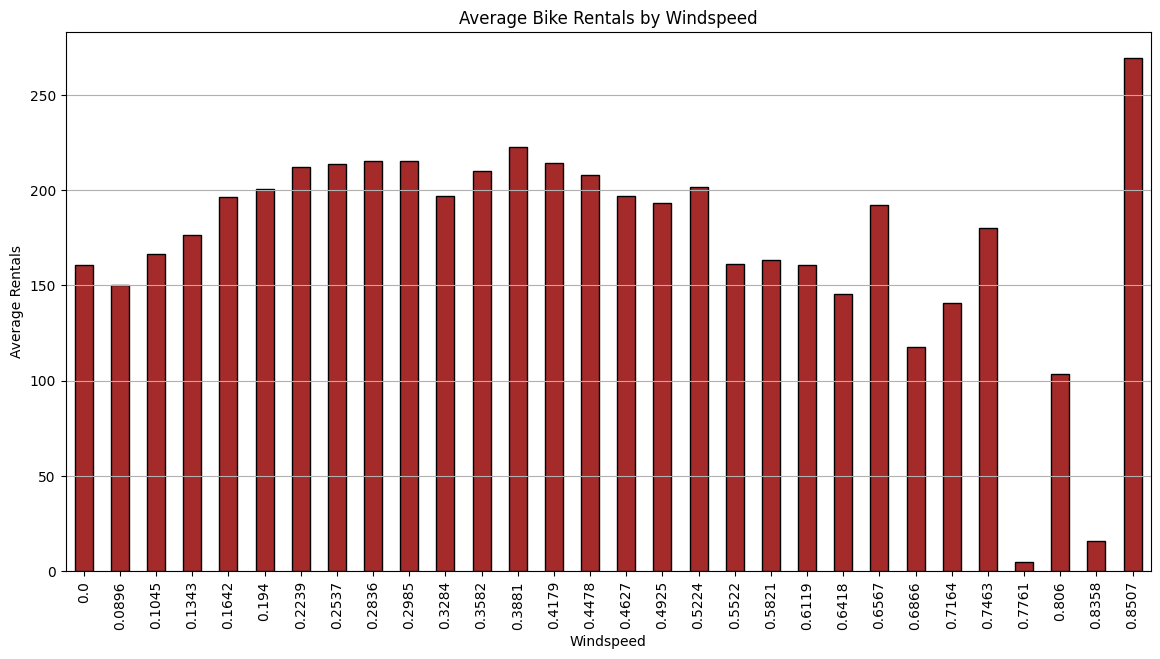

In [49]:
# Grouping the data by 'windspeed' and calculating the average rentals
windspeed_rentals = hour_df.groupby('windspeed')['cnt'].mean()

plt.figure(figsize=(14, 7))
windspeed_rentals.plot(kind='bar', color='brown', edgecolor='black')

# Setting labels and title
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Windspeed')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


In [50]:
# Separate features and target variable
X = hour_df.drop(['cnt'], axis=1)
y = hour_df['cnt']

# Identify categorical columns
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Pipeline for preprocessing
numeric_transformer = StandardScaler()

# Column transformer for both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [51]:
# Initializing the model
model_lr = LinearRegression()

# Fitting the model
model_lr.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluation
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Report")
print(f'RMSE: {rmse_lr}')
print(f'R² Score: {r2_lr}')


Linear Regression Report
RMSE: 0.000980989085468543
R² Score: 0.9999999999696091


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
# Initializing the model
model_dt = DecisionTreeRegressor(random_state=42)

# Fitting the model
model_dt.fit(X_train_scaled, y_train)

# Making predictions
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluation
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor Report")
print(f'RMSE: {rmse_dt}')
print(f'R² Score: {r2_dt}')


Decision Tree Regressor Report
RMSE: 5.6122554126688735
R² Score: 0.9990053054898811


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
# Initializing the model
model_rf = RandomForestRegressor(random_state=42)

# Fitting the model
model_rf.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluation
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Report")
print(f'RMSE: {rmse_rf}')
print(f'R² Score: {r2_rf}')


Random Forest Regressor Report
RMSE: 2.79179077179214
R² Score: 0.9997538609042325


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
# Initializing the model
model_gb = GradientBoostingRegressor(random_state=42)

# Fitting the model
model_gb.fit(X_train_scaled, y_train)

# Making predictions
y_pred_gb = model_gb.predict(X_test_scaled)

# Evaluation
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor Report")
print(f'RMSE: {rmse_gb}')
print(f'R² Score: {r2_gb}')


Gradient Boosting Regressor Report
RMSE: 5.352407165407821
R² Score: 0.9990952821626123


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
# Initializing the model
model_svr = make_pipeline(StandardScaler(with_mean=False), SVR())

# Fitting the model
model_svr.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svr = model_svr.predict(X_test_scaled)

# Evaluation
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor Report")
print(f'RMSE: {rmse_svr}')
print(f'R² Score: {r2_svr}')


Support Vector Regressor Report
RMSE: 172.41576079676503
R² Score: 0.06120927167928314


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
